In [24]:
import pandas as  pd
df=pd.read_csv("Tweets.csv")

In [25]:
df.head

<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason

In [26]:
dfn=df[['text','airline_sentiment']]
print(dfn.shape)

(14640, 2)


In [27]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
0                    @VirginAmerica What @dhepburn said.           neutral
1      @VirginAmerica plus you've added commercials t...          positive
2      @VirginAmerica I didn't today... Must mean I n...           neutral
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
...                                                  ...               ...
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14637  @AmericanAir Please bring American Airlines to...           neutral
14638  @AmericanAir you have my money, you change my ...          negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...           neutral

[14640 rows x 2 columns]>

In [28]:
df.columns


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [29]:
dfn=dfn[dfn['airline_sentiment']!='neutral']
print(dfn.shape)

(11541, 2)


In [30]:
dfn.head

<bound method NDFrame.head of                                                     text airline_sentiment
1      @VirginAmerica plus you've added commercials t...          positive
3      @VirginAmerica it's really aggressive to blast...          negative
4      @VirginAmerica and it's a really big bad thing...          negative
5      @VirginAmerica seriously would pay $30 a fligh...          negative
6      @VirginAmerica yes, nearly every time I fly VX...          positive
...                                                  ...               ...
14633  @AmericanAir my flight was Cancelled Flightled...          negative
14634         @AmericanAir right on cue with the delays👌          negative
14635  @AmericanAir thank you we got on a different f...          positive
14636  @AmericanAir leaving over 20 minutes Late Flig...          negative
14638  @AmericanAir you have my money, you change my ...          negative

[11541 rows x 2 columns]>

In [31]:
dfn["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [32]:
#ml cannot understand categorial data
labels=dfn.airline_sentiment.factorize()

In [33]:
labels

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [34]:
#0 is positive 1 represents negative

In [35]:
#retrieve the text data

In [36]:
tweet=dfn.text.values

In [38]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [39]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [18]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
________________________________________________

In [51]:
history = model.fit(padded_sequence,labels[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 39s 114ms/step - loss: 0.3894 - accuracy: 0.8388 - val_loss: 0.2142 - val_accuracy: 0.9168
Epoch 2/5
289/289 [==============================] - 44s 152ms/step - loss: 0.2193 - accuracy: 0.9150 - val_loss: 0.1726 - val_accuracy: 0.9359
Epoch 3/5
289/289 [==============================] - 46s 158ms/step - loss: 0.1658 - accuracy: 0.9362 - val_loss: 0.1635 - val_accuracy: 0.9424
Epoch 4/5
289/289 [==============================] - 55s 191ms/step - loss: 0.1317 - accuracy: 0.9518 - val_loss: 0.1657 - val_accuracy: 0.9437
Epoch 5/5
289/289 [==============================] - 59s 203ms/step - loss: 0.1134 - accuracy: 0.9579 - val_loss: 0.1791 - val_accuracy: 0.9394


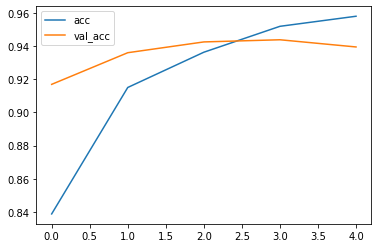

<Figure size 432x288 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

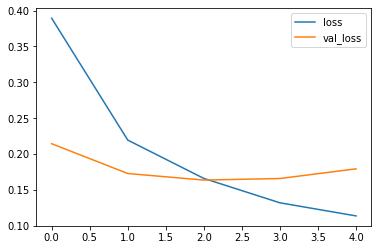

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")